# Анализ сети фитнес-центров «Культурист-датасаентист»

# Шаг 1. Загрузим данные

***Данные клиента за предыдущий до проверки факта оттока месяц:***

- 'gender' — пол;

- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

- 'Phone' — наличие контактного телефона;

- 'Age' — возраст;

- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

***Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:***

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

- 'Group_visits' — факт посещения групповых занятий;

- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;

- 'Churn' — факт оттока в текущем месяце.

# Шаг 2. Проведём исследовательский анализ данных (EDA)

- Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения;

- Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;

- Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

- Построим матрицу корреляций и отобразим её.

# Шаг 3. Построим модель прогнозирования оттока клиентов

***Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:***

- Разобьем данные на обучающую и валидационную выборку.
- Обучим модель на train-выборке двумя способами:
     - логистической регрессией,
     - случайным лесом.
     
- Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

# Шаг 4. Сделаем кластеризацию клиентов

- Проведём кластеризацию объектов (клиентов):

- Стандартизируем данные.

- Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 

- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

- Посмотрим на средние значения признаков для кластеров.

- Построим распределения признаков для кластеров.

- Для каждого полученного кластера посчитаем долю оттока.

# Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами




# Шаг 1. Загрузим данные

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


In [5]:
df.columns.tolist()

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn']

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [9]:
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [10]:
df.duplicated().sum()

0

***Пропусков и дубликатов нет***

# Шаг 2. Проведём исследовательский анализ данных (EDA)

In [11]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


- Мужчин и женщин почти одинаковое количество;

- Большинство посетителей либо живут либо работают рядом; 

- Почти у половины посетителей есть скидки;

- Треть пришли по промо-коду от посетителя купившего в первый раз абонемент;

- Номер телефона есть у 90%;

- В среднем все берут абонемент на 4.5 месяцев и стандартное отклонение так же 4.5 месяцев;

- Групповые занятия посещают около 40%;

- Средний возраст посетителей 29 лет;

- В среднем сумма пользования дополнительными услугами фитнес-центра около 147 рублей;

- До истечения конца срока контракта в среднем 4 месяца и стандартное отклонение так же 4 месяца;

- Лайфтайм около 3х месяцев с таким же стандартным отклонением;

- В среднем,с начала пользования абонементом, посещение составляет около двух разв неделю, стандартное отклонение около одного дня;

- За предыдущий месяц посещения в неделю немного меньше, чем с начала пользования обонементом и стандартное отклонение немножко выросло, но в общем картинка не очень поменялась;

- В текущем месяце ушел один человек



In [12]:
df.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


***В основном уходят те кто:***

- Покупают абонемент в среднем на 2 месяца;

- Посещают фитнес-зал в среднем около 1 раза в неделю;

- Редко посещают групповые занятия;

- Возвраст около 27 лет;

- Большая доля посетителей без скидок;

- Уходят практически после первых же посещений;

- Мужчины и женщины уходят практически в равных долях.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


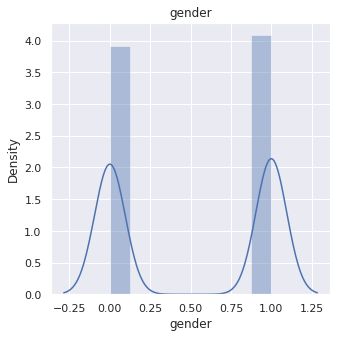

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


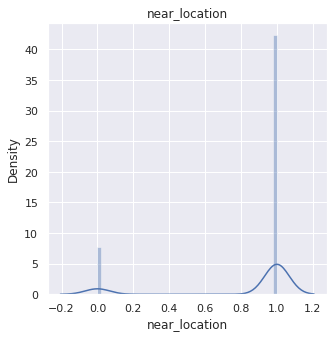

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


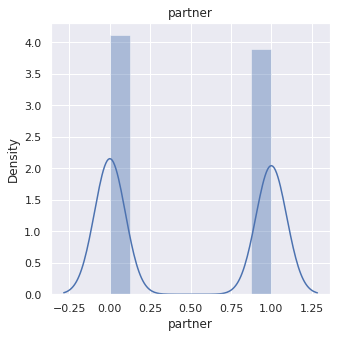

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


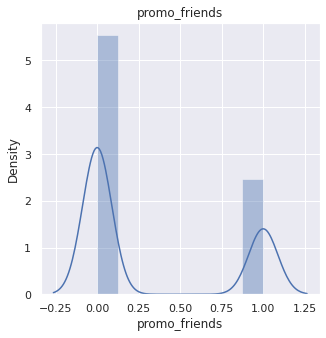

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


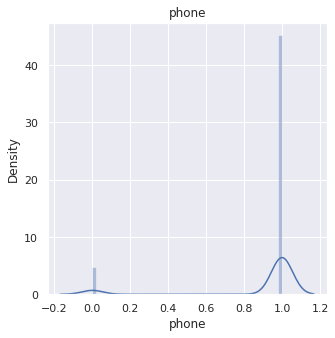

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


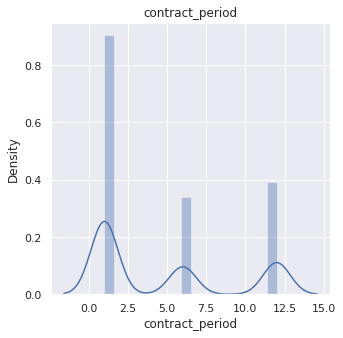

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


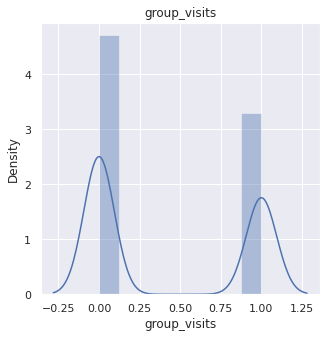

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


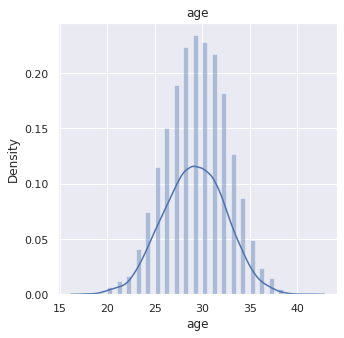

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


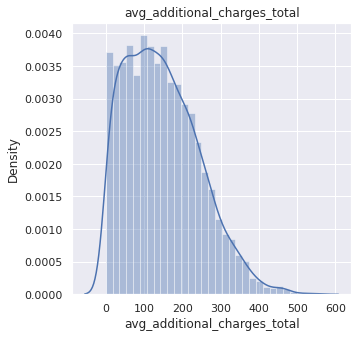

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


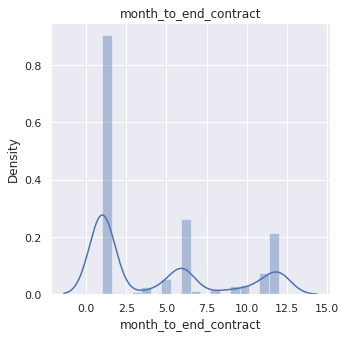

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


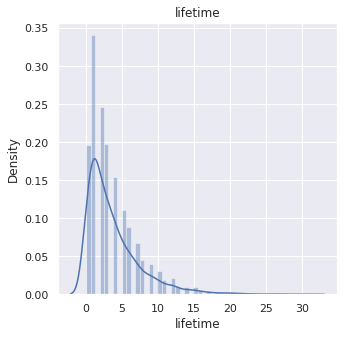

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


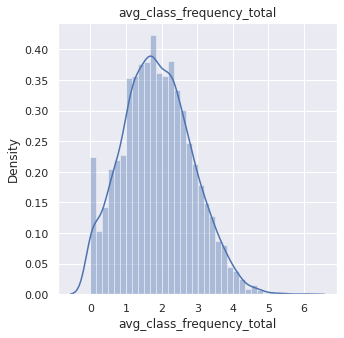

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


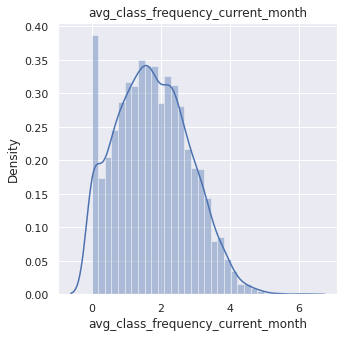

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


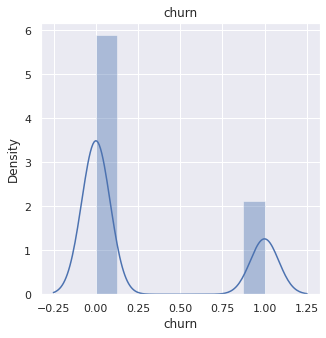

In [13]:
for column in df.columns:
    plt.figure(figsize=(5, 5))
    df.groupby('churn')[column]
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

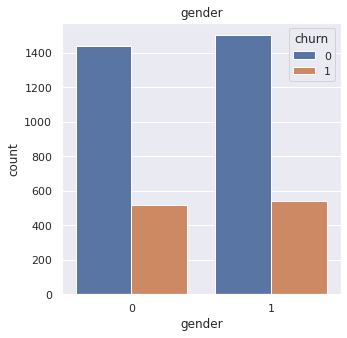

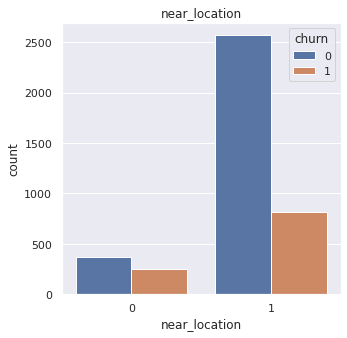

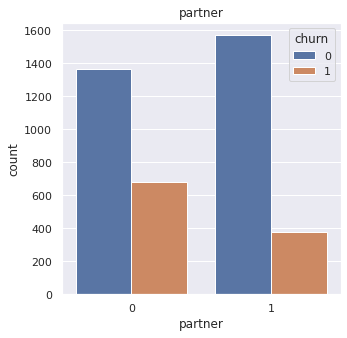

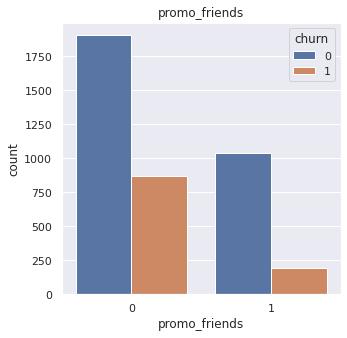

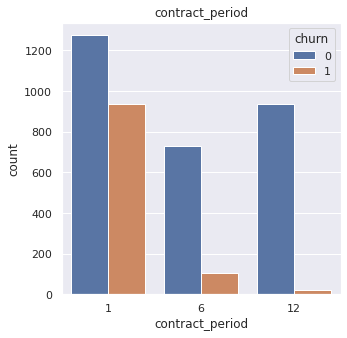

In [14]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

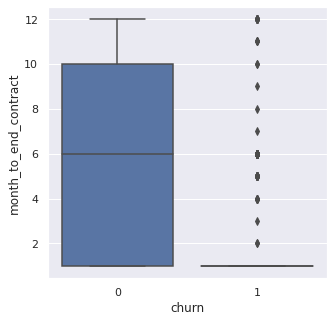

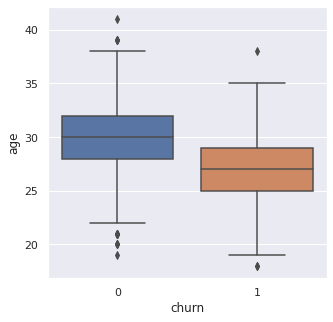

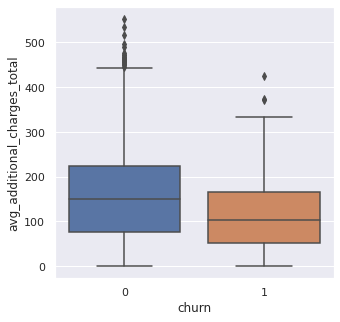

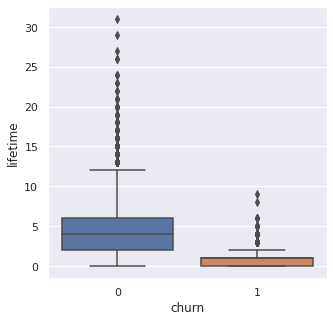

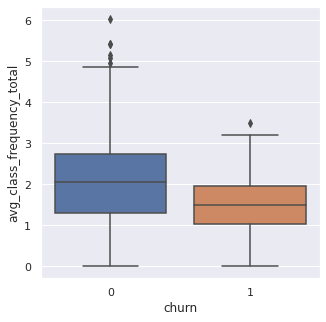

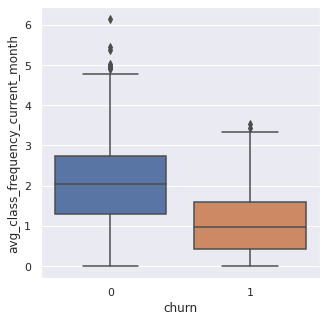

In [15]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.show()

***Графики подтвердили наш вывод***

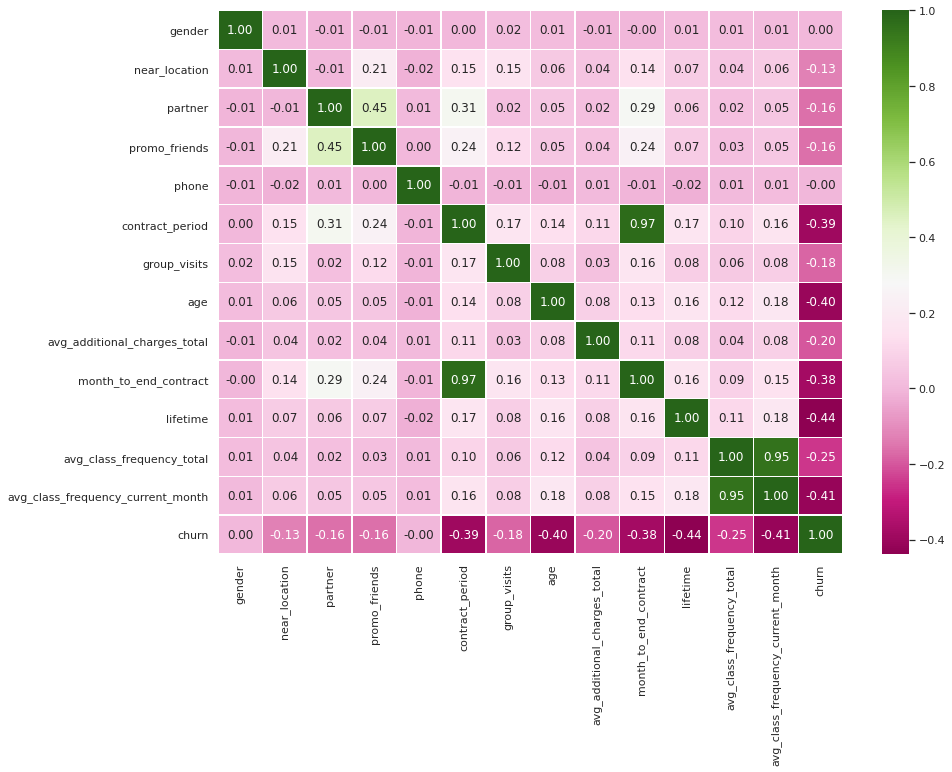

In [16]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

***По матрице корреляций видна мультиколлинеарность между посещениями в текущем и предыдущем месяцах, между длительностью текущего абонемента и оставшимися месяцами до окончания абонемента. Нулевая корреляция с целевой переменной у номеров телефонов и гендерного признака.***

# Шаг 3. Построим модель прогнозирования оттока клиентов

In [17]:
X = df.drop('churn', axis = 1)
y = df['churn']

# Логистическая регрессия

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [19]:
model = LogisticRegression(solver='liblinear')

In [20]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [22]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy | Нет баланса классов: 0.93
Precision: 0.89
Recall: 0.84
F1: 0.87


# Cлучайный лес

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [24]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy | Нет баланса классов: 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85


***Показатели по логистической регрессии выглядят немного лучше***

# Шаг 4. Сделаем кластеризацию клиентов

In [25]:
df_cs = df.drop(['churn'], axis=1)
df_columns_list = df_cs.columns
df_cs = StandardScaler().fit_transform(df_cs)
df_cs = pd.DataFrame(df_cs, columns = df_columns_list).astype('float64')

In [26]:
linked = linkage(df_cs, method = 'ward')

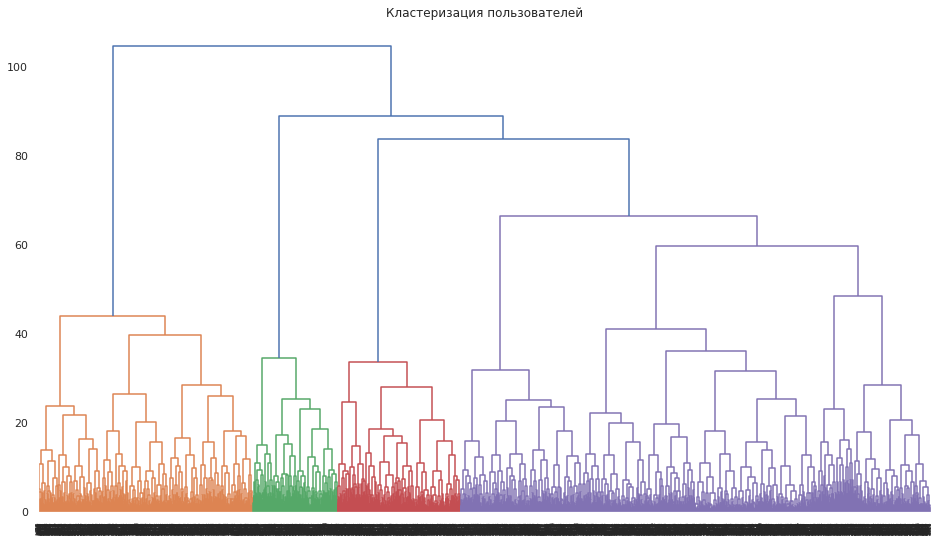

In [27]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

***Выделилось 4 кластера***

In [28]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df_cs)
df['cluster'] = labels

In [29]:
df.cluster.value_counts()

0    1260
2     867
1     865
3     622
4     386
Name: cluster, dtype: int64

In [30]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.49,0.56,0.50,0.49,0.52
near_location,0.72,0.85,0.94,0.95,0.86
partner,0.30,0.28,0.74,0.81,0.47
promo_friends,0.01,0.07,0.48,1.00,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,1.93,2.68,11.83,3.02,4.78
group_visits,0.28,0.45,0.55,0.44,0.43
age,28.14,30.05,29.89,29.05,29.30
avg_additional_charges_total,129.41,161.30,163.33,141.36,144.21
month_to_end_contract,1.83,2.48,10.79,2.83,4.47


***Нулевой кластер явный лидер по оттоку клиентов:***

 - Средний возраст 28 лет;
 
 - Удаленность работы или жилья больше чем у других кластеров;
 
 - В основном не промо и не сотрудник-партнер, пришли сами;
 
 - Абонемент менее 2х месяцев;
 
 - Групповые занятия мало посещают;
 
 - Меньше всех тратят на дополнительные услуги;
 
 - Оставшиеся месяца до окочания абонемента менее 2х;
 
 - Лайфтайм около 2 дней;
 
 - Средняя частота посещения в неделю 1 раз
 
 
 ***4й кластер, второй лидер по оттоку клиентов ***
 
 - Средний возраст 28.5 лет;
 
 - Удаленность работы или жилья от фитнес-центра;
 
 - Около 80% это партнеры-сотруднки;
 
 - В основном промо;
 
 - Абонемент менее около 3х месяцев;
 
 - Групповые занятия мало посещают;
 
 - Мало тратят на дополнительные услуги;
 
 - Оставшиеся месяца до окочания абонемента около 2х;
 
 - Лайфтайм около 3х дней;
 
 - Средняя частота посещения в неделю 1-2 раза
 
 
 ***3й кластер, третий по счету по оттоку клиентов***
 
 - Средний возраст 29 лет;
 
 - Удаленность работы или жилья от фитнес-центра;
 
 - Почти 50% это партнеры-сотруднки;
 
 - В основном не промо;
 
 - Абонемент около 3.5 месяцев;
 
 - Групповые занятия посещают почти в 50%;
 
 - Тратят на дополнительные услуги немного больше предыдущих кластеров;
 
 - Оставшиеся месяца до окочания абонемента около 3х;
 
 - Лайфтайм около 4х дней;
 
 - Средняя частота посещения в неделю 1-2 раза
 
 
 ***1й кластер - четвертый по оттоку, но малооттекающий***
 
 - Средний возраст 30 лет;
 
 - Живут или работают около фитнес-центра;
 
 - Маленький процент партнеров-сотрудников;
 
 - В основном не промо;
 
 - Абонемент менее около 3х месяцев;
 
 - Групповые занятия в 50% посещений;
 
 - Хорошо тратят на дополнительные услуги;
 
 - Оставшиеся месяца до окочания абонемента около 3х;
 
 - Лайфтайм около 5х дней;
 
 - Средняя частота посещения в неделю около 3х раз
 
 
 ***2й кластер - пятый по оттоку, но выигрывает по задерживаемости в фитнес-центре***
 
 - Средний возраст 30 лет;
 
 - Живут или работают около фитнес-центра;
 
 - Около 70% это партнеры-сотрудники;
 
 - По промо около 50%;
 
 - Абонемент менее около 12 месяцев;
 
 - Групповые занятия около 55% посещений;
 
 - Хорошо тратят на дополнительные услуги;
 
 - Оставшиеся месяца до окочания абонемента около 11;
 
 - Лайфтайм около 5х дней;
 
 - Средняя частота посещения в неделю около 2х раз

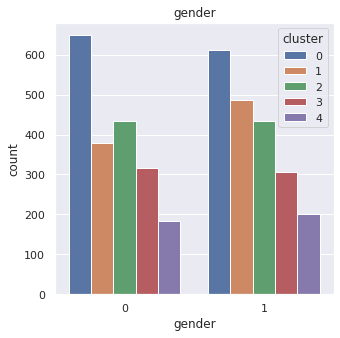

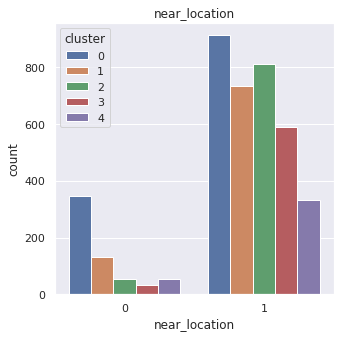

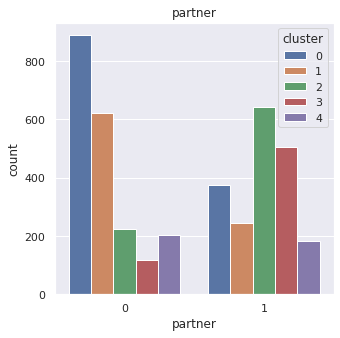

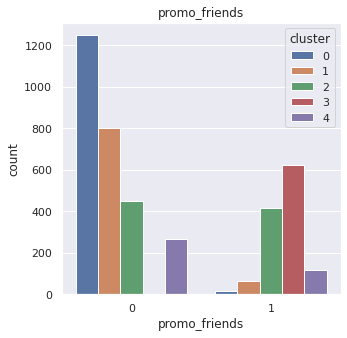

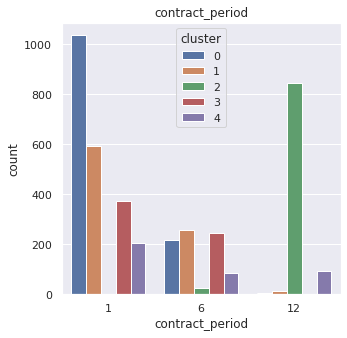

In [31]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

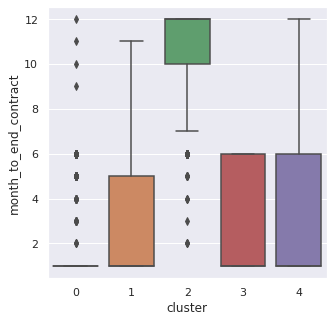

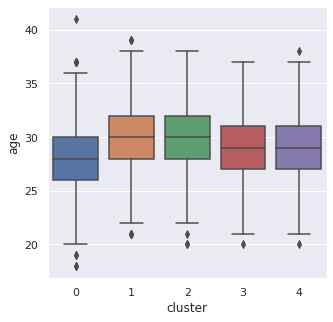

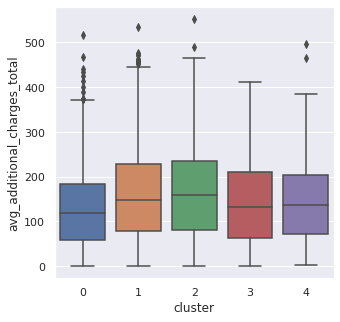

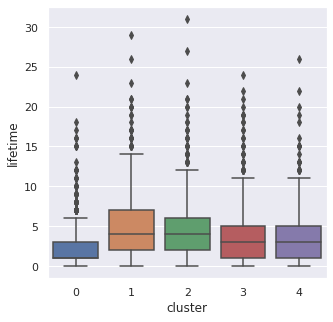

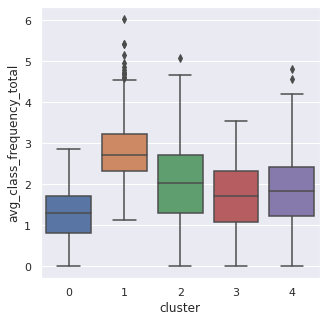

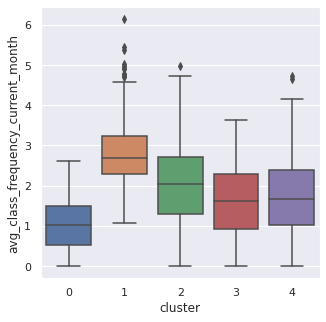

In [32]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

***На графиках тоже выделяются 1й и 4 кластер, как лидеры в оттока из фитнес-центра***

In [33]:
churn_count = df.groupby('cluster')['churn'].count().reset_index()\
        .sort_values(by='churn', ascending=False)
churn_count

,cluster,churn
0,0,1260
2,2,867
1,1,865
3,3,622
4,4,386


In [34]:
churn_count['count_churn_ob'] = df['churn'].count()
churn_count


,cluster,churn,count_churn_ob
0,0,1260,4000
2,2,867,4000
1,1,865,4000
3,3,622,4000
4,4,386,4000


In [35]:
churn_count['percents'] = churn_count['churn'] / churn_count['count_churn_ob'] * 100
churn_count

,cluster,churn,count_churn_ob,percents
0,0,1260,4000,31.50
2,2,867,4000,21.68
1,1,865,4000,21.62
3,3,622,4000,15.55
4,4,386,4000,9.65


***В долях по оттоку клиентов так же лидирует 0й кластер(31%), следом, равные в долях(21%)2й и 1й, меньше всего отток у 4го кластера (9%)***

# Выводы:

- Абонементы 2 и менее месяцев плохо удерживают клиентов;

- Чем старше возвраст, тем надежнее клиент;

- Чем ближе работа или дом, тем больше вероятности, что клиент задержиться.

# Рекомендации:

- Делать скидку на длительные абонементы, что бы в дальнейшем не уходили те, у кого абонемент на месяц-два. В абонементы от 6 месяцев включать например бесплатные занятия с тренером  или акции на массаж, в общем какие-нибудь заманушки, но уговаривать клиента купить абонемент от 6ти месяцев;

- Давать рекламу на потенцияльных клиентов живущих рядом с фитнес-центром(социальные сети, листовки);

- Целевая аудитория 29-30 лет;

- Удерживать клиента в первые разы посещения, делать какие-то акции или подарки(в следущих 2 посещения, после того, как пришел впервые);

- Заинтересовывать клиента групповыми занятиями.


 